In [ ]:
import pandas as pd
import numpy as np
import re

In [ ]:
df_eda = pd.read_csv("avito_pfm_post_cleaning.csv")
df_eda.head()

,Prix,BoiteàV,Carburant,kilometrage,Marque,Modèle,NBporte,Origine,Première main,Puissance fiscale,Etat,équipements,Age
0,155.0,Manuelle,Diesel,40.0,Renault,Express,5,WW au Maroc,Non,6.0,Bon,[],2.0
1,180.0,Automatique,Diesel,100.0,Dacia,Duster,5,WW au Maroc,Non,6.0,Excellent,"[""Limiteur de vitesse"", ""Jantes aluminium"", ""C...",3.0
2,225.0,Automatique,Diesel,120.0,Hyundai,Tucson,5,WW au Maroc,Non,6.0,Très bon,"[""Jantes aluminium"", ""Airbags"", ""Cam\u00e9ra d...",6.0
3,130.0,Manuelle,Diesel,200.0,Renault,Clio,5,WW au Maroc,Oui,6.0,Excellent,"[""Climatisation"", ""Vitres \u00e9lectriques""]",12.0
4,148.0,Manuelle,Diesel,150.0,Ford,Focus,5,Importée neuve,Non,6.0,Excellent,"[""Limiteur de vitesse"", ""Jantes aluminium"", ""O...",9.0


In [ ]:
# Liste des variables continues
continous_vars = ['Prix', 'kilometrage']

# Conversion en numérique si besoin
for var in continous_vars:
    df_eda[var] = pd.to_numeric(df_eda[var], errors='coerce')

# Statistiques
for var in continous_vars:
    if df_eda[var].notnull().sum() > 0:
        mean = df_eda[var].mean()
        std = df_eda[var].std()
        variance = df_eda[var].var()
        cv = std / mean * 100
        q1 = df_eda[var].quantile(0.25)
        q2 = df_eda[var].median()
        q3 = df_eda[var].quantile(0.75)

        print(f"Statistiques pour la variable '{var}':")
        print(f"Moyenne: {mean:.2f}")
        print(f"Écart-Type: {std:.2f}")
        print(f"Variance: {variance:.2f}")
        print(f"Coefficient de Variation (CV): {cv:.2f}%")
        print(f"Q1 (25e percentile): {q1:.2f}")
        print(f"Q2 (Médiane): {q2:.2f}")
        print(f"Q3 (75e percentile): {q3:.2f}")
        print("-" * 50)
    else:
        print(f"La variable '{var}' ne contient pas de données valides.\n" + "-"*50)
        
    


Statistiques pour la variable 'Prix':
Moyenne: 179.70
Écart-Type: 163.20
Variance: 26633.80
Coefficient de Variation (CV): 90.82%
Q1 (25e percentile): 95.00
Q2 (Médiane): 145.00
Q3 (75e percentile): 220.00
--------------------------------------------------
Statistiques pour la variable 'kilometrage':
Moyenne: 126.19
Écart-Type: 80.82
Variance: 6531.11
Coefficient de Variation (CV): 64.04%
Q1 (25e percentile): 70.00
Q2 (Médiane): 120.00
Q3 (75e percentile): 180.00
--------------------------------------------------


In [ ]:
# Liste des variables continues
continous_vars = ['Puissance fiscale', 'Age']

# Conversion en numérique si besoin
for var in continous_vars:
    df_eda[var] = pd.to_numeric(df_eda[var], errors='coerce')

# Statistiques
for var in continous_vars:
    if df_eda[var].notnull().sum() > 0:
        mean = df_eda[var].mean()
        std = df_eda[var].std()
        variance = df_eda[var].var()
        cv = std / mean * 100
        q1 = df_eda[var].quantile(0.25)
        q2 = df_eda[var].median()
        q3 = df_eda[var].quantile(0.75)

        print(f"Statistiques pour la variable '{var}':")
        print(f"Moyenne: {mean:.2f}")
        print(f"Écart-Type: {std:.2f}")
        print(f"Variance: {variance:.2f}")
        print(f"Coefficient de Variation (CV): {cv:.2f}%")
        print(f"Q1 (25e percentile): {q1:.2f}")
        print(f"Q2 (Médiane): {q2:.2f}")
        print(f"Q3 (75e percentile): {q3:.2f}")
        print("-" * 50)
    else:
        print(f"La variable '{var}' ne contient pas de données valides.\n" + "-"*50)
        
    


Statistiques pour la variable 'Puissance fiscale':
Moyenne: 7.46
Écart-Type: 1.96
Variance: 3.86
Coefficient de Variation (CV): 26.34%
Q1 (25e percentile): 6.00
Q2 (Médiane): 7.00
Q3 (75e percentile): 8.00
--------------------------------------------------
Statistiques pour la variable 'Age':
Moyenne: 9.95
Écart-Type: 7.30
Variance: 53.25
Coefficient de Variation (CV): 73.34%
Q1 (25e percentile): 5.00
Q2 (Médiane): 8.00
Q3 (75e percentile): 13.00
--------------------------------------------------


La distribution des variables continues

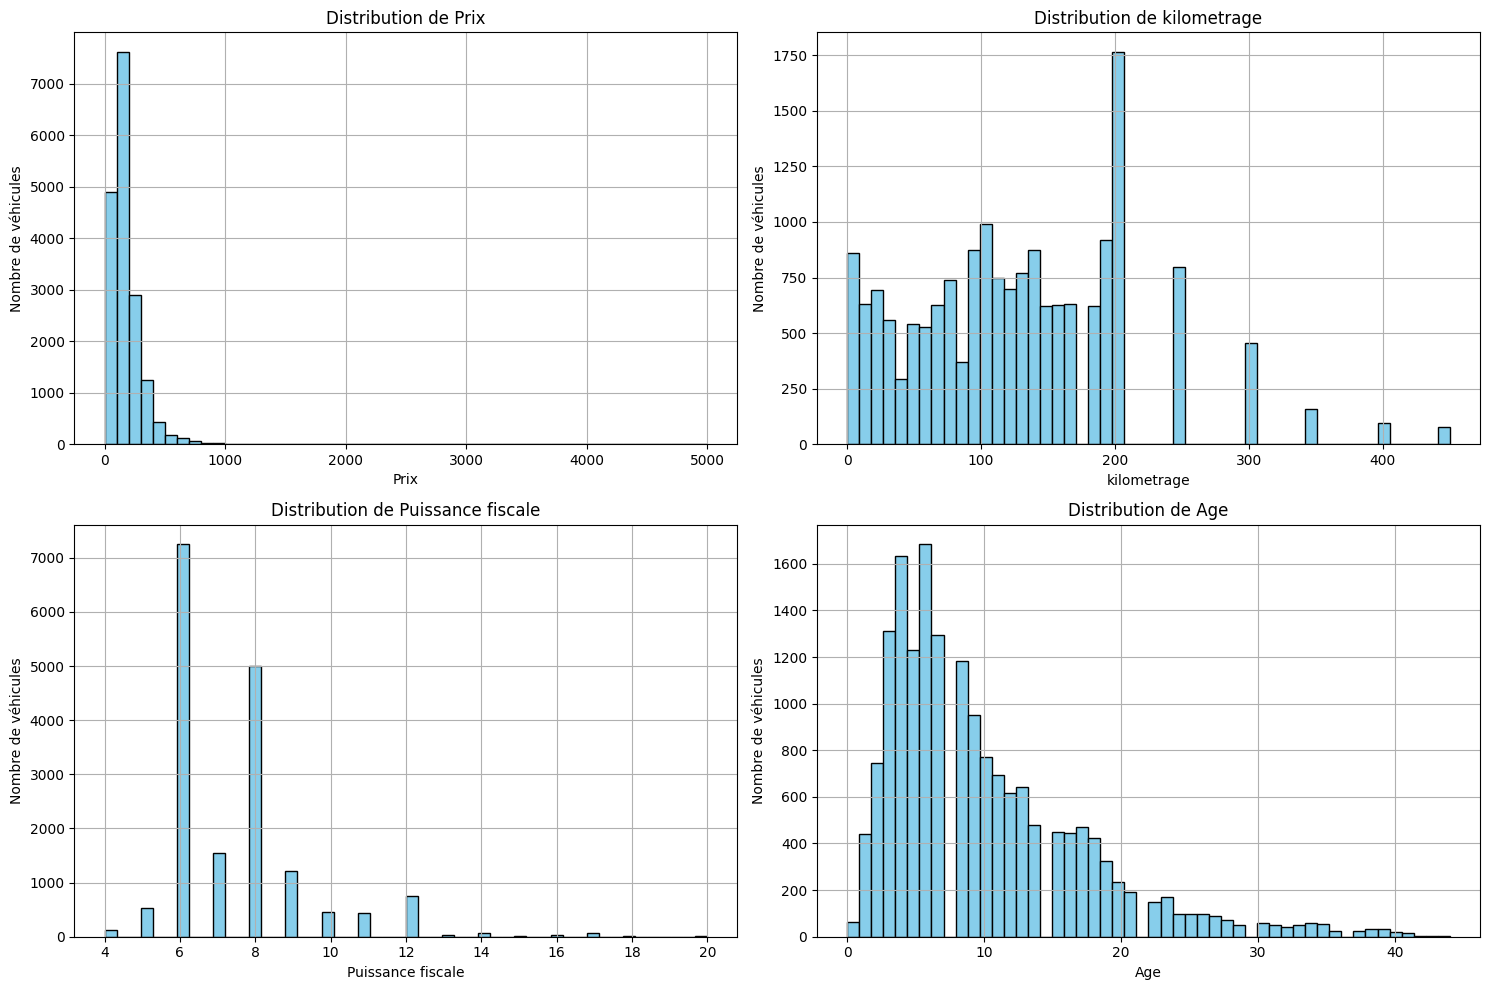

In [ ]:
import matplotlib.pyplot as plt

# 1 : Définir les noms de colonnes dans une LISTE
features_continues = ['Prix', 'kilometrage', 'Puissance fiscale', 'Age']

# 2 : Dessiner les histogrammes
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features_continues, 1):
    plt.subplot(2, 2, i)  
    plt.hist(df_eda[feature], bins=50, color='skyblue', edgecolor='black')
    plt.title(f"Distribution de {feature}")
    plt.xlabel(feature)
    plt.ylabel("Nombre de véhicules")
    plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# pip install plotly

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Créer une figure avec plusieurs sous-graphiques
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Distribution du Prix (en milliers MAD)", "Distribution du Kilométrage (en milliers Km)",
                    "Distribution de la Puissance Fiscale (en CV)", "Distribution de l'Âge du véhicule (en années)")
)

# Prix
fig.add_trace(
    go.Histogram(x=df_eda['Prix'], name="Prix"),
    row=1, col=1
)

# Kilométrage
fig.add_trace(
    go.Histogram(x=df_eda['kilometrage'], name="Kilométrage"),
    row=1, col=2
)

# Puissance fiscale
fig.add_trace(
    go.Histogram(x=df_eda['Puissance fiscale'], name="Puissance Fiscale"),
    row=2, col=1
)

# Âge du véhicule
fig.add_trace(
    go.Histogram(x=df_eda['Age'], name="Âge"),
    row=2, col=2
)

# Mise en forme générale
fig.update_layout(
    height=900, width=1000,
    title_text="Distribution des variables continues",
    showlegend=False
)

# Affichage
fig.show()


La distribution des variables discrètes

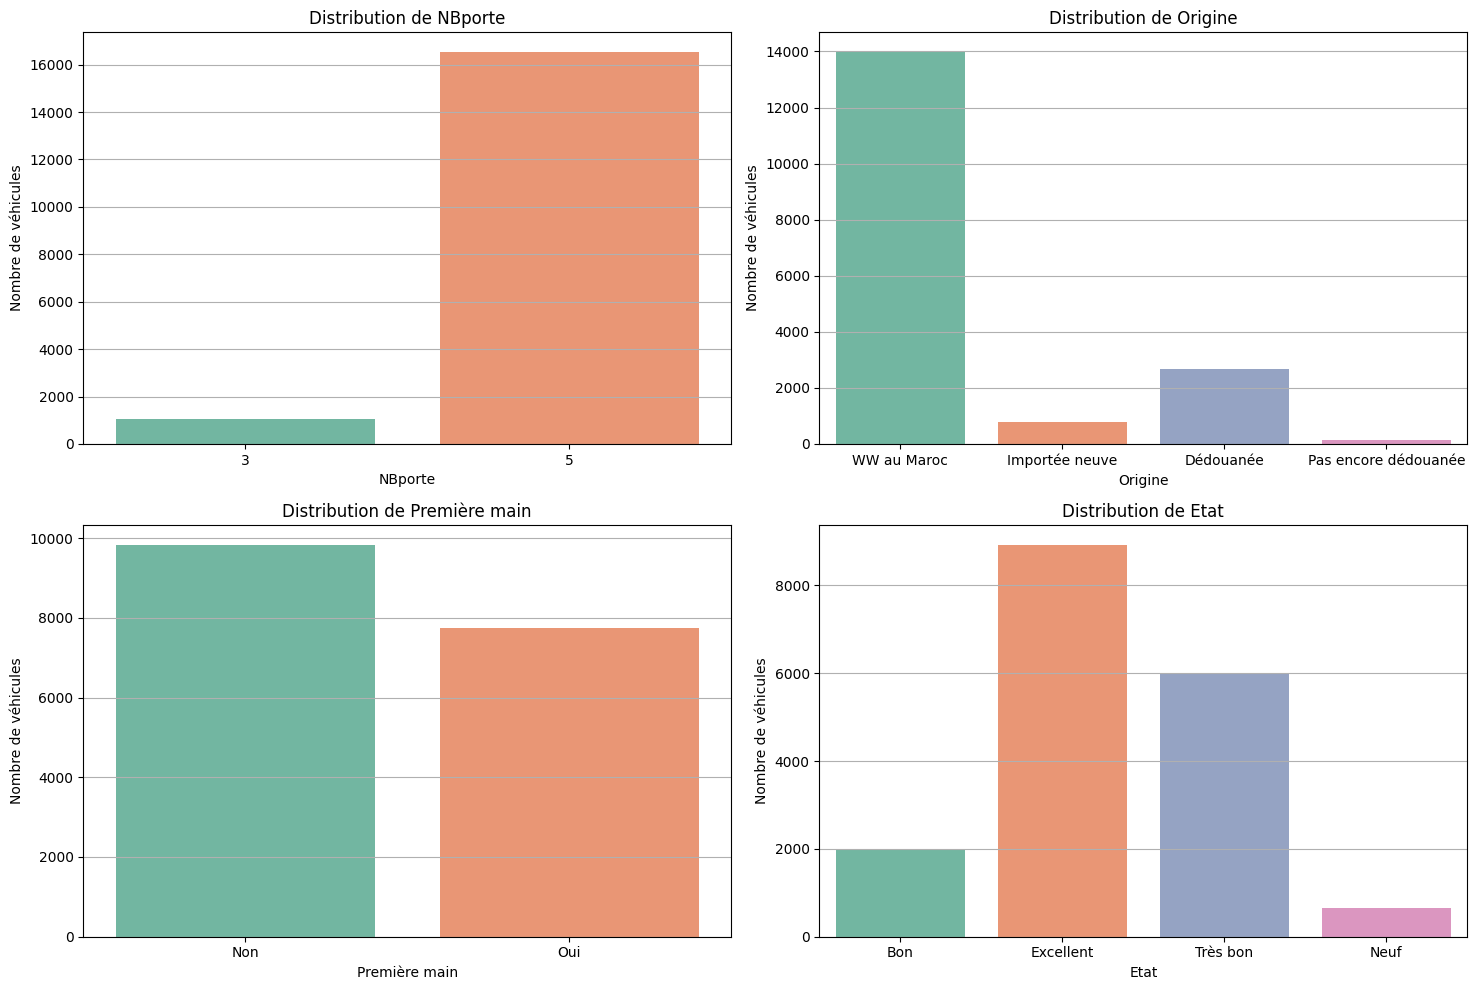

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables discrètes/catégorielles
features_discretes = ['NBporte', 'Origine', 'Première main', 'Etat']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features_discretes, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df_eda, x=feature, hue=feature, palette="Set2", legend=False)
    plt.title(f"Distribution de {feature}")
    plt.xlabel(feature)
    plt.ylabel("Nombre de véhicules")
    plt.grid(axis='y')

plt.tight_layout()
plt.show()


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 🔹 Compter les valeurs de chaque variable discrète
count_carburant = df_eda['Carburant'].value_counts().reset_index()
count_carburant.columns = ['Carburant', 'count']

count_boitev = df_eda['BoiteàV'].value_counts().reset_index()
count_boitev.columns = ['BoiteàV', 'count']

count_origine = df_eda['Origine'].value_counts().reset_index()
count_origine.columns = ['Origine', 'count']

count_premiere_main = df_eda['Première main'].value_counts().reset_index()
count_premiere_main.columns = ['Première main', 'count']

count_etat = df_eda['Etat'].value_counts().reset_index()
count_etat.columns = ['Etat', 'count']

count_nbporte = df_eda['NBporte'].value_counts().reset_index()
count_nbporte.columns = ['NBporte', 'count']

# 🔹 Créer les sous-graphiques (subplot)
fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=("Type de Carburant", "Boîte à Vitesse", 
                    "Origine", "Première Main", 
                    "État du Véhicule","Nomber de Porte du Véhicule")
)

# 🔹 Ajouter chaque graphique dans la figure
fig.add_trace(
    go.Bar(x=count_carburant['Carburant'], y=count_carburant['count'], name="Carburant"),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=count_boitev['BoiteàV'], y=count_boitev['count'], name="Boîte à Vitesse"),
    row=1, col=2
)

fig.add_trace(
    go.Bar(x=count_origine['Origine'], y=count_origine['count'], name="Origine"),
    row=2, col=1
)

fig.add_trace(
    go.Bar(x=count_premiere_main['Première main'], y=count_premiere_main['count'], name="Première main"),
    row=2, col=2
)

fig.add_trace(
    go.Bar(x=count_etat['Etat'], y=count_etat['count'], name="État"),
    row=3, col=1
)

fig.add_trace(
    go.Bar(x=count_nbporte['NBporte'], y=count_nbporte['count'], name="Nomber de Porte"),
    row=3, col=2
)

# 🔹 Mise en forme générale
fig.update_layout(
    height=1200, width=1000,
    title_text="Distribution des variables discrètes",
    showlegend=False
)

# 🔹 Affichage final
fig.show()


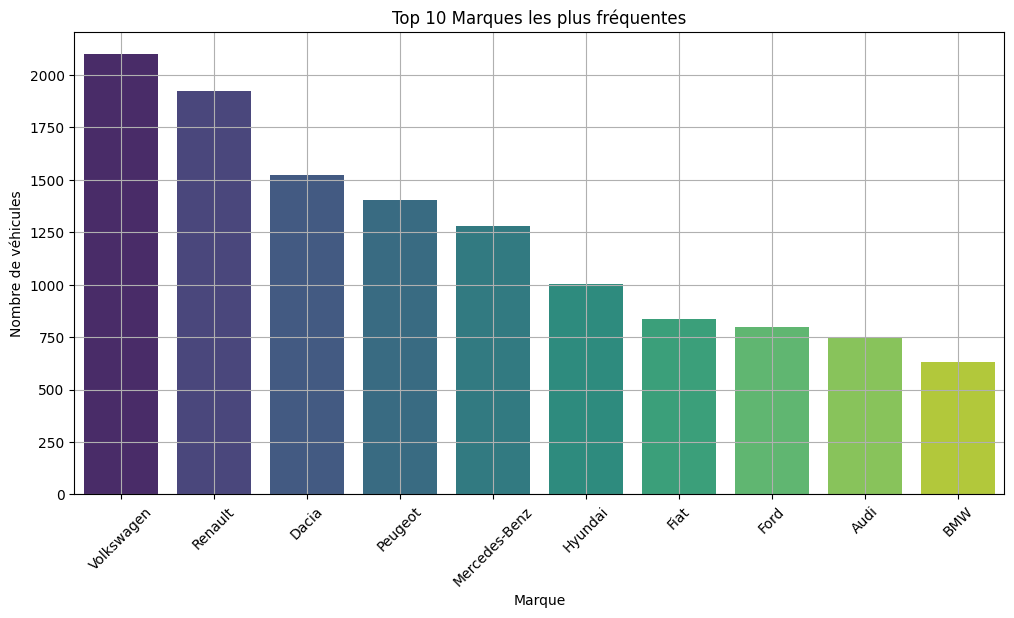

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 Marques les plus fréquentes
top_marques = df_eda['Marque'].value_counts().head(10)

# Création du graphique
plt.figure(figsize=(12,6))
sns.barplot(x=top_marques.index, y=top_marques.values, palette="viridis", hue=top_marques.index, legend=False)
plt.title("Top 10 Marques les plus fréquentes")
plt.xlabel("Marque")
plt.ylabel("Nombre de véhicules")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


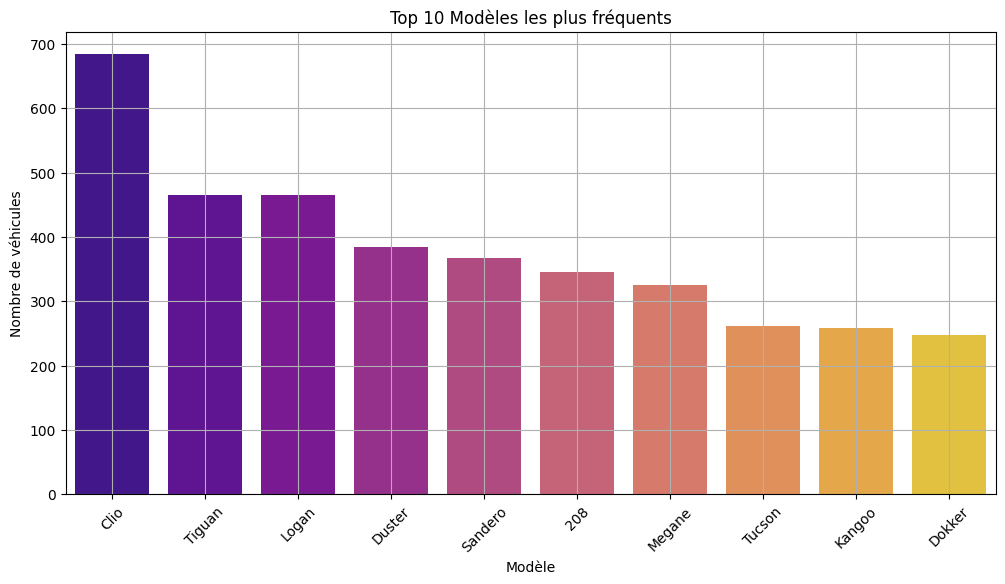

In [ ]:
# Top 10 Modèles les plus fréquents
top_modeles = df_eda['Modèle'].value_counts().head(10)

# Création du graphique
plt.figure(figsize=(12,6))
sns.barplot(x=top_modeles.index, y=top_modeles.values, palette="plasma", hue=top_modeles.index, legend=False)
plt.title("Top 10 Modèles les plus fréquents")
plt.xlabel("Modèle")
plt.ylabel("Nombre de véhicules")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Plotting the correlation coefficient heatmap to visualize the relationship of each numericle variable

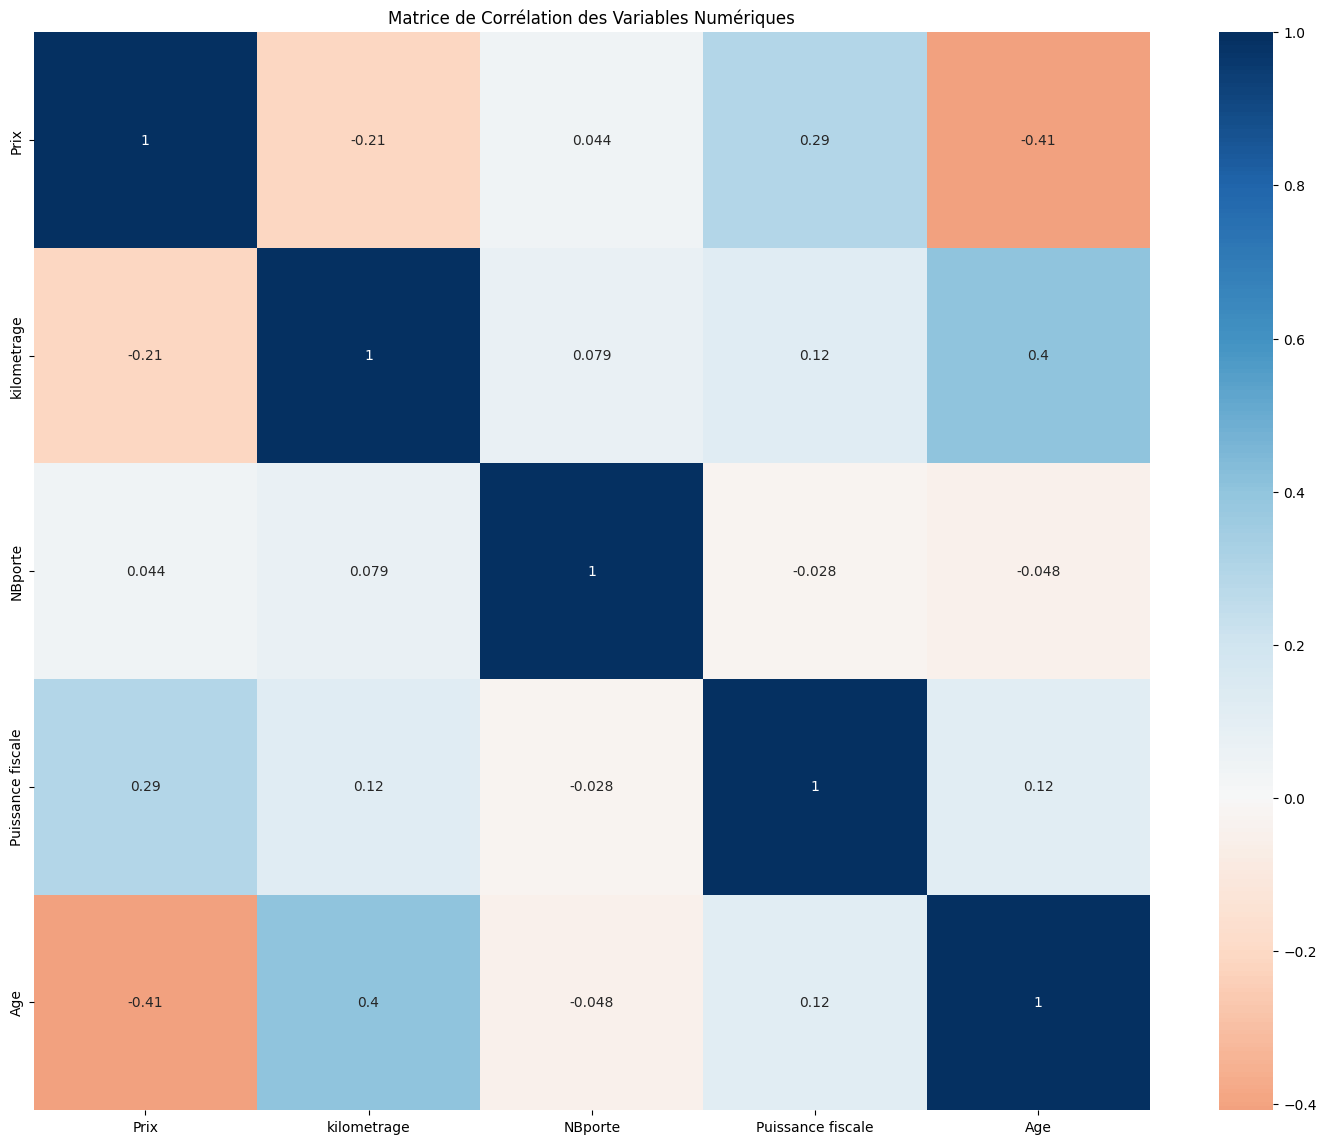

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Garder uniquement les colonnes numériques
df_corr = df_eda.select_dtypes(include=['float64', 'int64'])

# Tracer la Heatmap de la matrice de corrélation
plt.figure(figsize=(18,14))
sns.heatmap(df_corr.corr(), annot=True, cmap="RdBu", center=0)
plt.title("Matrice de Corrélation des Variables Numériques")
plt.show()


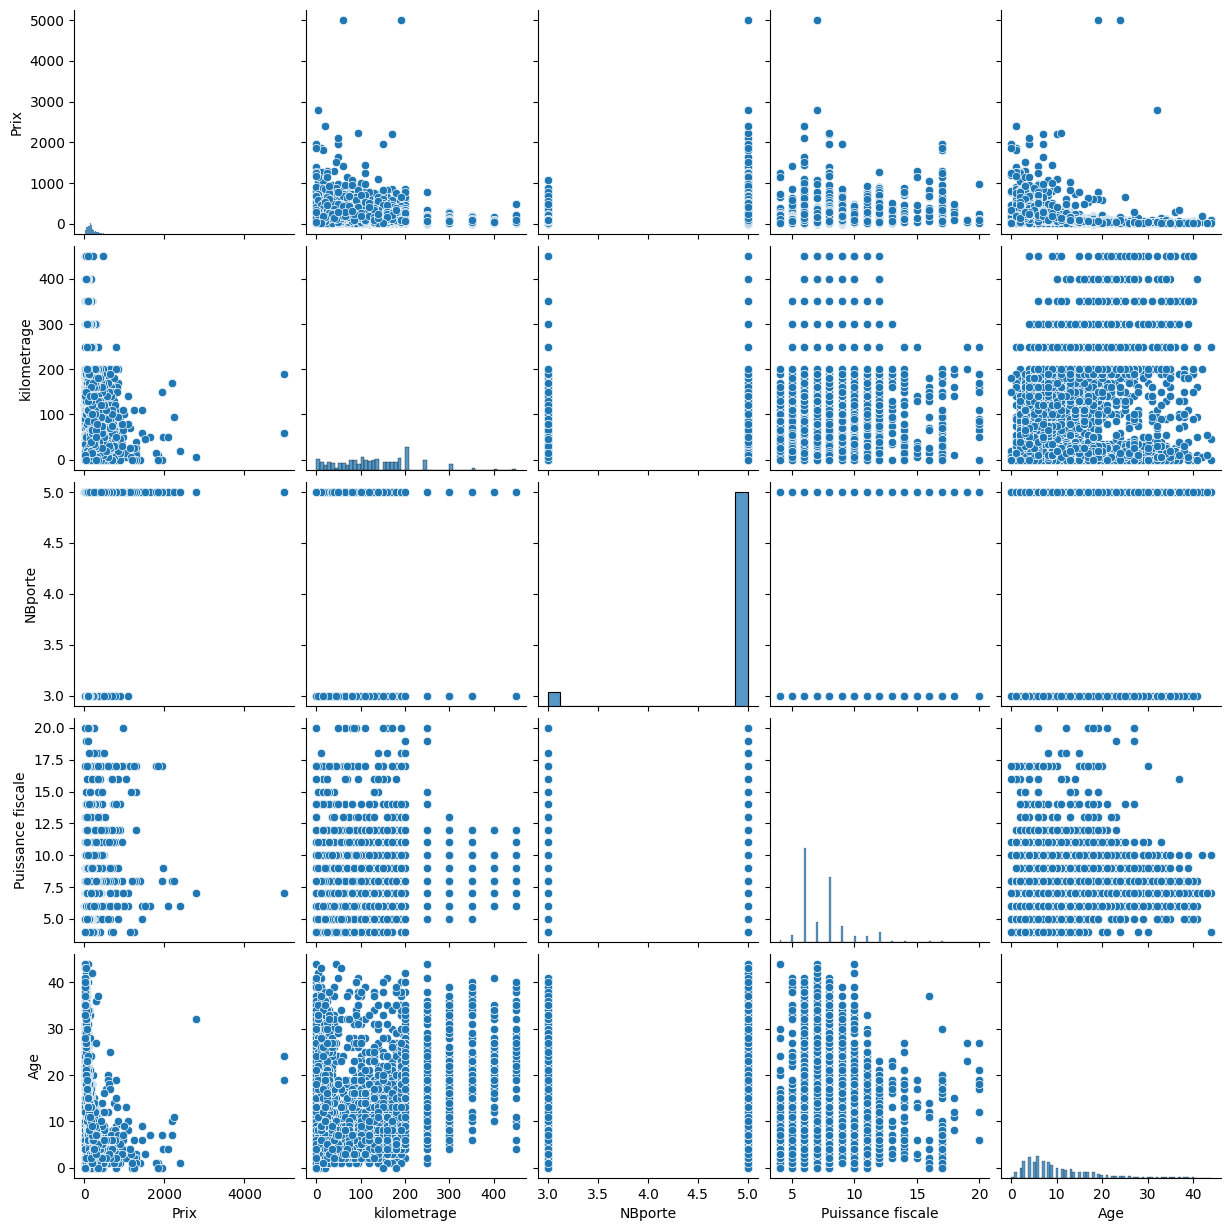

In [ ]:
sns.pairplot(df_eda)

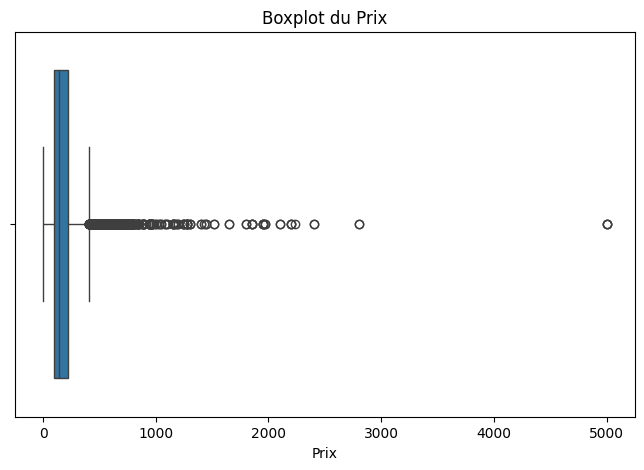

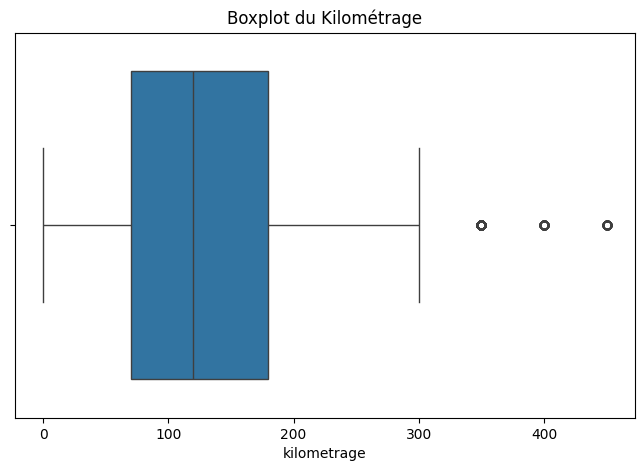

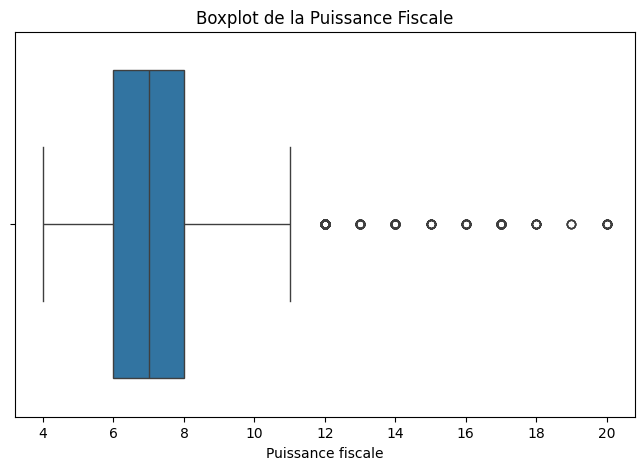

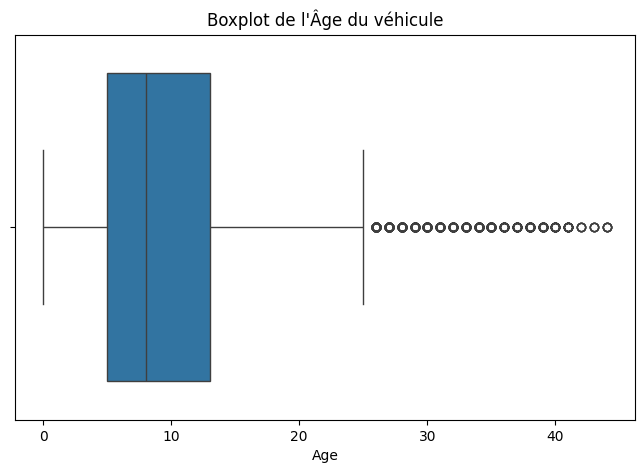

In [ ]:
# Prix
plt.figure(figsize=(8,5))
sns.boxplot(x=df_eda['Prix'])
plt.title("Boxplot du Prix")
plt.show()

# Kilométrage
plt.figure(figsize=(8,5))
sns.boxplot(x=df_eda['kilometrage'])
plt.title("Boxplot du Kilométrage")
plt.show()

# Puissance fiscale
plt.figure(figsize=(8,5))
sns.boxplot(x=df_eda['Puissance fiscale'])
plt.title("Boxplot de la Puissance Fiscale")
plt.show()

# Age
plt.figure(figsize=(8,5))
sns.boxplot(x=df_eda['Age'])
plt.title("Boxplot de l'Âge du véhicule")
plt.show()


In [ ]:
Q1 = df_eda['Prix'].quantile(0.25)
Q3 = df_eda['Prix'].quantile(0.75)
IQR = Q3 - Q1
seuil_bas = Q1 - 1.5 * IQR
seuil_haut = Q3 + 1.5 * IQR
outliers = df_eda[(df_eda['Prix'] < seuil_bas) | (df_eda['Prix'] > seuil_haut)]

print(f"Q1 = {Q1}")
print(f"Q3 = {Q3}")
print(f"IQR = {IQR}")
print(f"Seuil bas = {seuil_bas}")
print(f"Seuil haut = {seuil_haut}")
print(f"Nombre de valeurs aberrantes = {outliers.shape[0]}")


Q1 = 95.0
Q3 = 220.0
IQR = 125.0
Seuil bas = -92.5
Seuil haut = 407.5
Nombre de valeurs aberrantes = 912


In [ ]:
Q1 = df_eda['Age'].quantile(0.25)
Q3 = df_eda['Age'].quantile(0.75)
IQR = Q3 - Q1
seuil_bas = Q1 - 1.5 * IQR
seuil_haut = Q3 + 1.5 * IQR
outliers = df_eda[(df_eda['Age'] < seuil_bas) | (df_eda['Age'] > seuil_haut)]

print(f"Q1 = {Q1}")
print(f"Q3 = {Q3}")
print(f"IQR = {IQR}")
print(f"Seuil bas = {seuil_bas}")
print(f"Seuil haut = {seuil_haut}")
print(f"Nombre de valeurs aberrantes = {outliers.shape[0]}")

Q1 = 5.0
Q3 = 13.0
IQR = 8.0
Seuil bas = -7.0
Seuil haut = 25.0
Nombre de valeurs aberrantes = 791


In [ ]:
Q1 = df_eda['kilometrage'].quantile(0.25)
Q3 = df_eda['kilometrage'].quantile(0.75)
IQR = Q3 - Q1
seuil_bas = Q1 - 1.5 * IQR
seuil_haut = Q3 + 1.5 * IQR
outliers = df_eda[(df_eda['kilometrage'] < seuil_bas) | (df_eda['kilometrage'] > seuil_haut)]

print(f"Q1 = {Q1}")
print(f"Q3 = {Q3}")
print(f"IQR = {IQR}")
print(f"Seuil bas = {seuil_bas}")
print(f"Seuil haut = {seuil_haut}")
print(f"Nombre de valeurs aberrantes = {outliers.shape[0]}")

Q1 = 70.0
Q3 = 180.0
IQR = 110.0
Seuil bas = -95.0
Seuil haut = 345.0
Nombre de valeurs aberrantes = 329


In [ ]:
Q1 = df_eda['Puissance fiscale'].quantile(0.25)
Q3 = df_eda['Puissance fiscale'].quantile(0.75)
IQR = Q3 - Q1
seuil_bas = Q1 - 1.5 * IQR
seuil_haut = Q3 + 1.5 * IQR
outliers = df_eda[(df_eda['Puissance fiscale'] < seuil_bas) | (df_eda['Puissance fiscale'] > seuil_haut)]

print(f"Q1 = {Q1}")
print(f"Q3 = {Q3}")
print(f"IQR = {IQR}")
print(f"Seuil bas = {seuil_bas}")
print(f"Seuil haut = {seuil_haut}")
print(f"Nombre de valeurs aberrantes = {outliers.shape[0]}")

Q1 = 6.0
Q3 = 8.0
IQR = 2.0
Seuil bas = 3.0
Seuil haut = 11.0
Nombre de valeurs aberrantes = 1023


In [ ]:
df_outliers = df_eda[df_eda['Prix'] > 400]  # Par exemple
df_outliers[['Prix', 'Marque', 'Modèle', 'Age', 'kilometrage', 'Puissance fiscale']]


,Prix,Marque,Modèle,Age,kilometrage,Puissance fiscale
33,475.0,Mercedes-Benz,Classe CLA,4.0,450.0,8.0
55,420.0,Land Rover,Range Rover Sport,8.0,180.0,12.0
59,490.0,Mercedes-Benz,220,6.0,80.0,8.0
74,410.0,BMW,Série 5,4.0,100.0,8.0
78,479.0,Land Rover,Range Rover Velar,7.0,85.0,8.0
...,...,...,...,...,...,...
17478,445.0,Volkswagen,Golf 8,4.0,60.0,8.0
17520,445.0,Tesla,Model 3,5.0,75.0,12.0
17535,530.0,Land Rover,Range Rover Vogue,6.0,110.0,12.0
17553,500.0,Land Rover,Range Rover Sport,6.0,120.0,12.0


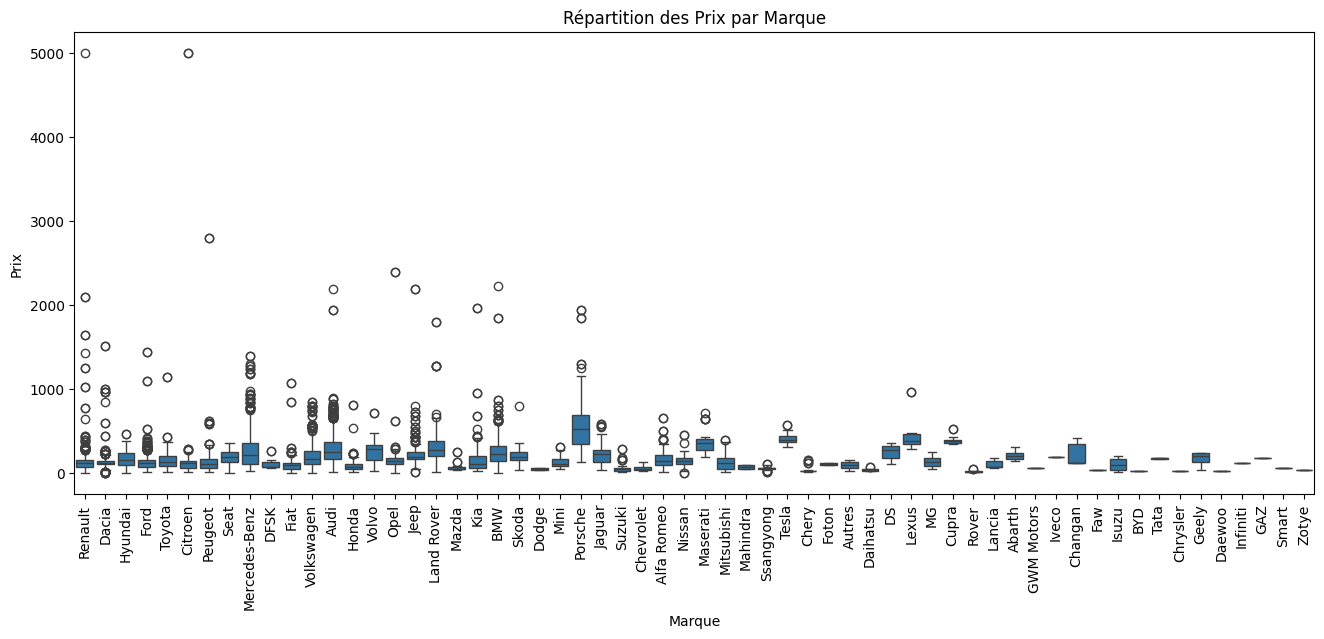

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Marque', y='Prix', data=df_eda)
plt.xticks(rotation=90)
plt.title("Répartition des Prix par Marque")
plt.show()


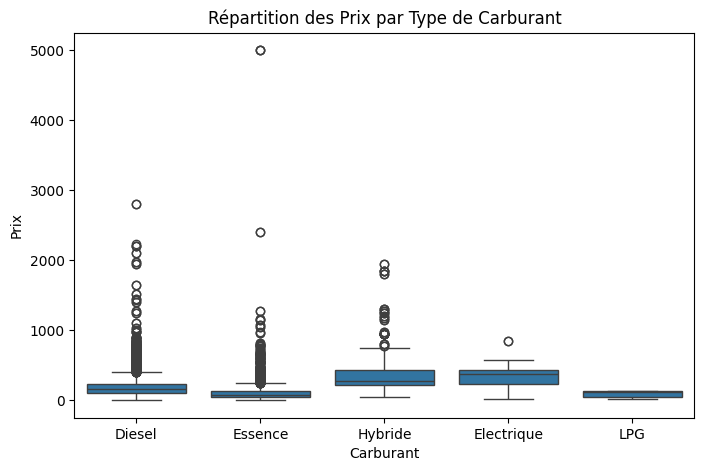

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Carburant', y='Prix', data=df_eda)
plt.title("Répartition des Prix par Type de Carburant")
plt.show()


In [ ]:
import scipy.stats as stats

# Utiliser ton vrai DataFrame
anova_data = [group["Prix"].values for name, group in df_eda.groupby("Marque")]

anova_result = stats.f_oneway(*anova_data)

print("Statistique F =", anova_result.statistic)
print("P-value =", anova_result.pvalue)

# Interprétation
if anova_result.pvalue < 0.05:
    print("Il y a une différence significative entre les marques en termes de prix.")
else:
    print("Pas de différence significative détectée.")



Statistique F = 66.56245230103133
P-value = 0.0
Il y a une différence significative entre les marques en termes de prix.


In [ ]:
import scipy.stats as stats

# Test ANOVA pour la variable 'Modèle'
anova_data_model = [group["Prix"].values for name, group in df_eda.groupby("Modèle")]
anova_result_model = stats.f_oneway(*anova_data_model)

# Résultats
print("Statistique F =", anova_result_model.statistic)
print("P-value =", anova_result_model.pvalue)

# Interprétation
if anova_result_model.pvalue < 0.05:
    print("Il y a une différence significative entre les modèles en termes de prix.")
else:
    print("Aucune différence significative entre les modèles.")


Statistique F = 21.83145477094518
P-value = 0.0
Il y a une différence significative entre les modèles en termes de prix.


In [ ]:
import scipy.stats as stats

# Test ANOVA pour la variable 'Modèle'
anova_data_model = [group["Prix"].values for name, group in df_eda.groupby("Etat")]
anova_result_model = stats.f_oneway(*anova_data_model)

# Résultats
print("Statistique F =", anova_result_model.statistic)
print("P-value =", anova_result_model.pvalue)

# Interprétation
if anova_result_model.pvalue < 0.05:
    print("Il y a une différence significative entre les Etat en termes de prix.")
else:
    print("Aucune différence significative entre les Etat.")


Statistique F = 362.7061997094882
P-value = 1.4252770901150178e-228
Il y a une différence significative entre les Etat en termes de prix.


In [ ]:
import scipy.stats as stats

# Test ANOVA pour la variable 'Modèle'
anova_data_model = [group["Prix"].values for name, group in df_eda.groupby("Origine")]
anova_result_model = stats.f_oneway(*anova_data_model)

# Résultats
print("Statistique F =", anova_result_model.statistic)
print("P-value =", anova_result_model.pvalue)

# Interprétation
if anova_result_model.pvalue < 0.05:
    print("Il y a une différence significative entre les Origine en termes de prix.")
else:
    print("Aucune différence significative entre les Origine.")


Statistique F = 218.07342220511552
P-value = 6.630323243199666e-139
Il y a une différence significative entre les Origine en termes de prix.


In [ ]:
import scipy.stats as stats

# Test ANOVA pour la variable 'Modèle'
anova_data_model = [group["Prix"].values for name, group in df_eda.groupby("Première main")]
anova_result_model = stats.f_oneway(*anova_data_model)

# Résultats
print("Statistique F =", anova_result_model.statistic)
print("P-value =", anova_result_model.pvalue)

# Interprétation
if anova_result_model.pvalue < 0.05:
    print("Il y a une différence significative entre les Première main en termes de prix.")
else:
    print("Aucune différence significative entre les Première main.")


Statistique F = 1109.3806223161591
P-value = 6.201692612897059e-236
Il y a une différence significative entre les Première main en termes de prix.


In [ ]:
import scipy.stats as stats

# Utiliser ton vrai DataFrame
anova_data = [group["Prix"].values for name, group in df_eda.groupby("Carburant")]

anova_result = stats.f_oneway(*anova_data)

print("Statistique F =", anova_result.statistic)
print("P-value =", anova_result.pvalue)

# Interprétation
if anova_result.pvalue < 0.05:
    print("Il y a une différence significative entre les types de Carburant en termes de prix.")
else:
    print("Pas de différence significative détectée.")


Statistique F = 295.19678978039815
P-value = 3.87395888396889e-246
Il y a une différence significative entre les types de Carburant en termes de prix.


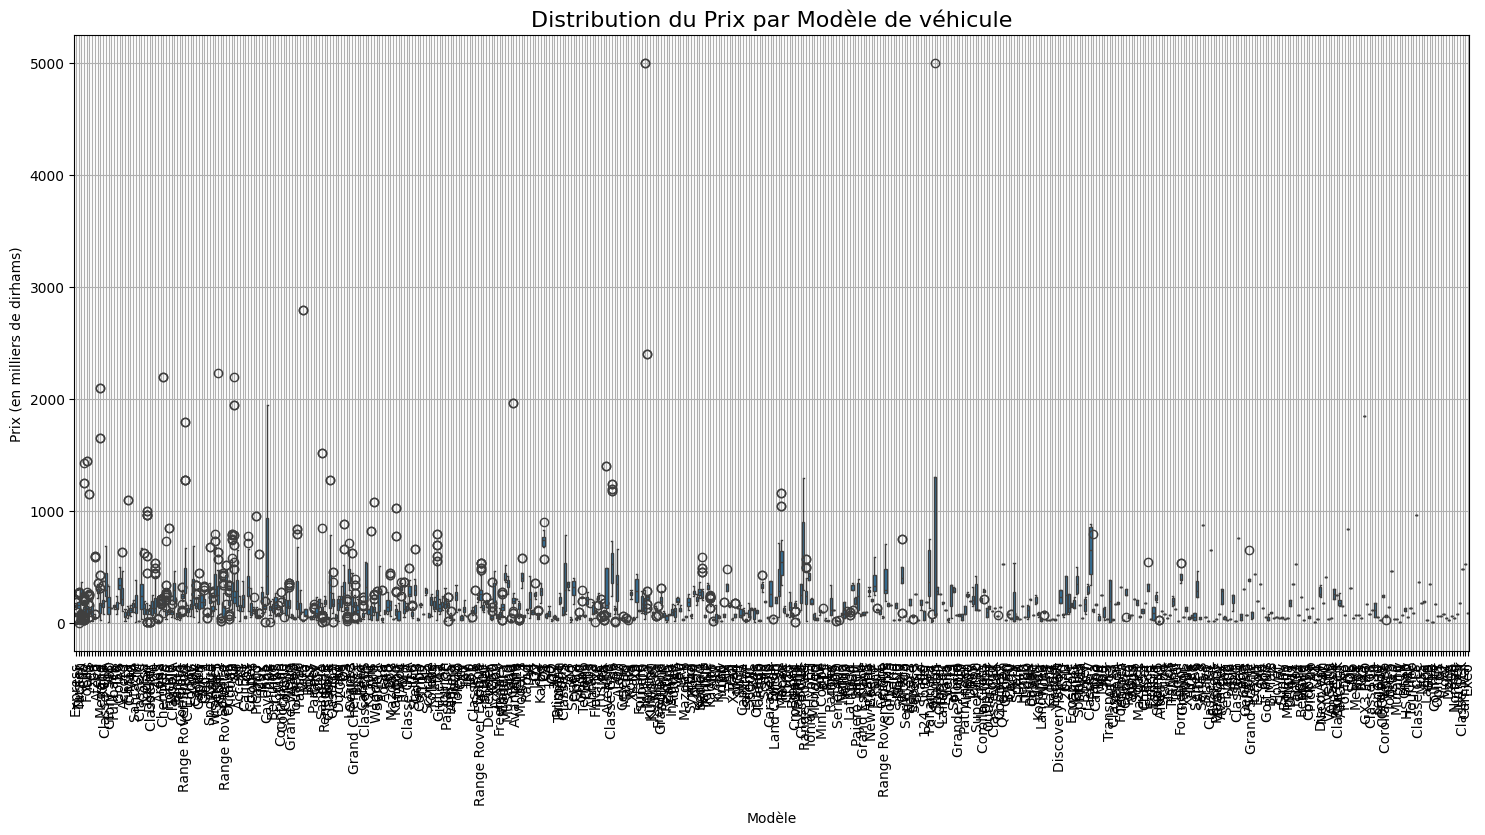

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 8))
sns.boxplot(data=df_eda, x="Modèle", y="Prix")
plt.title("Distribution du Prix par Modèle de véhicule", fontsize=16)
plt.xticks(rotation=90)
plt.xlabel("Modèle")
plt.ylabel("Prix (en milliers de dirhams)")
plt.grid(True)
plt.show()


In [ ]:
df_transformed = pd.read_csv("avito_pfm_transformed.csv")

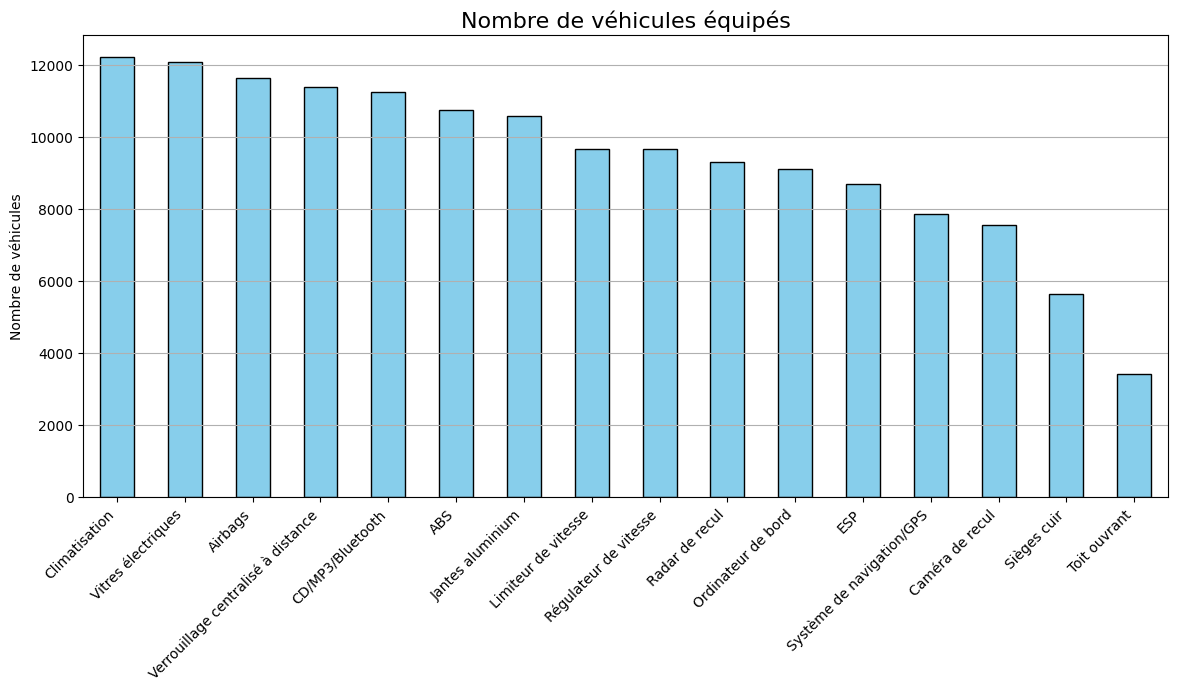

In [ ]:
import matplotlib.pyplot as plt

# Liste des colonnes équipements
equipements_cols = ['Limiteur de vitesse', 'Jantes aluminium', 'CD/MP3/Bluetooth', 
                    'Climatisation', 'Vitres électriques', 'Verrouillage centralisé à distance',
                    'Airbags', 'Caméra de recul', 'Système de navigation/GPS', 'Radar de recul',
                    'ESP', 'ABS', 'Ordinateur de bord', 'Régulateur de vitesse', 'Sièges cuir', 'Toit ouvrant']

# Compter les équipements sur df_transformed (pas df_eda)
equipement_counts = df_transformed[equipements_cols].sum().sort_values(ascending=False)

# Afficher le barplot
plt.figure(figsize=(14, 6))
equipement_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Nombre de véhicules équipés", fontsize=16)
plt.ylabel("Nombre de véhicules")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y')
plt.show()


In [ ]:
from scipy.stats import ttest_ind

# Séparer les groupes
prix_avec = df_transformed[df_transformed["Climatisation"] == 1]["Prix"]
prix_sans = df_transformed[df_transformed["Climatisation"] == 0]["Prix"]

# Test T
stat, p_value = ttest_ind(prix_avec, prix_sans)
print(f"Statistique T : {stat:.3f}, P-value : {p_value:.5f}")

# Conclusion
if p_value < 0.05:
    print("Il y a une différence significative du prix entre véhicules avec et sans climatisation.")
else:
    print("Pas de différence significative.")


Statistique T : 11.311, P-value : 0.00000
Il y a une différence significative du prix entre véhicules avec et sans climatisation.


In [ ]:
from scipy.stats import ttest_ind

# Séparer les groupes
prix_avec = df_transformed[df_transformed["Limiteur de vitesse"] == 1]["Prix"]
prix_sans = df_transformed[df_transformed["Limiteur de vitesse"] == 0]["Prix"]

# Test T
stat, p_value = ttest_ind(prix_avec, prix_sans)
print(f"Statistique T : {stat:.3f}, P-value : {p_value:.5f}")

# Conclusion
if p_value < 0.05:
    print("Il y a une différence significative du prix entre véhicules avec et sans Limiteur de vitesse.")
else:
    print("Pas de différence significative.")


Statistique T : 27.181, P-value : 0.00000
Il y a une différence significative du prix entre véhicules avec et sans Limiteur de vitesse.


In [ ]:
from scipy.stats import ttest_ind

# Séparer les groupes
prix_avec = df_transformed[df_transformed["Jantes aluminium"] == 1]["Prix"]
prix_sans = df_transformed[df_transformed["Jantes aluminium"] == 0]["Prix"]

# Test T
stat, p_value = ttest_ind(prix_avec, prix_sans)
print(f"Statistique T : {stat:.3f}, P-value : {p_value:.5f}")

# Conclusion
if p_value < 0.05:
    print("Il y a une différence significative du prix entre véhicules avec et sans Jantes aluminium.")
else:
    print("Pas de différence significative.")


Statistique T : 21.032, P-value : 0.00000
Il y a une différence significative du prix entre véhicules avec et sans Jantes aluminium.


In [ ]:
from scipy.stats import ttest_ind

# Séparer les groupes
prix_avec = df_transformed[df_transformed["CD/MP3/Bluetooth"] == 1]["Prix"]
prix_sans = df_transformed[df_transformed["CD/MP3/Bluetooth"] == 0]["Prix"]

# Test T
stat, p_value = ttest_ind(prix_avec, prix_sans)
print(f"Statistique T : {stat:.3f}, P-value : {p_value:.5f}")

# Conclusion
if p_value < 0.05:
    print("Il y a une différence significative du prix entre véhicules avec et sans CD/MP3/Bluetooth.")
else:
    print("Pas de différence significative.")


Statistique T : 9.475, P-value : 0.00000
Il y a une différence significative du prix entre véhicules avec et sans CD/MP3/Bluetooth.


In [ ]:
from scipy.stats import ttest_ind

# Séparer les groupes
prix_avec = df_transformed[df_transformed["Vitres électriques"] == 1]["Prix"]
prix_sans = df_transformed[df_transformed["Vitres électriques"] == 0]["Prix"]

# Test T
stat, p_value = ttest_ind(prix_avec, prix_sans)
print(f"Statistique T : {stat:.3f}, P-value : {p_value:.5f}")

# Conclusion
if p_value < 0.05:
    print("Il y a une différence significative du prix entre véhicules avec et sans Vitres électriques.")
else:
    print("Pas de différence significative.")


Statistique T : 8.477, P-value : 0.00000
Il y a une différence significative du prix entre véhicules avec et sans Vitres électriques.


In [ ]:
from scipy.stats import ttest_ind

# Séparer les groupes
prix_avec = df_transformed[df_transformed["Verrouillage centralisé à distance"] == 1]["Prix"]
prix_sans = df_transformed[df_transformed["Verrouillage centralisé à distance"] == 0]["Prix"]

# Test T
stat, p_value = ttest_ind(prix_avec, prix_sans)
print(f"Statistique T : {stat:.3f}, P-value : {p_value:.5f}")

# Conclusion
if p_value < 0.05:
    print("Il y a une différence significative du prix entre véhicules avec et sans Verrouillage centralisé à distance.")
else:
    print("Pas de différence significative.")


Statistique T : 10.370, P-value : 0.00000
Il y a une différence significative du prix entre véhicules avec et sans Verrouillage centralisé à distance.


In [ ]:
from scipy.stats import ttest_ind

# Séparer les groupes
prix_avec = df_transformed[df_transformed["Airbags"] == 1]["Prix"]
prix_sans = df_transformed[df_transformed["Airbags"] == 0]["Prix"]

# Test T
stat, p_value = ttest_ind(prix_avec, prix_sans)
print(f"Statistique T : {stat:.3f}, P-value : {p_value:.5f}")

# Conclusion
if p_value < 0.05:
    print("Il y a une différence significative du prix entre véhicules avec et sans Airbags.")
else:
    print("Pas de différence significative.")


Statistique T : 13.678, P-value : 0.00000
Il y a une différence significative du prix entre véhicules avec et sans Airbags.


In [ ]:
from scipy.stats import ttest_ind

# Séparer les groupes
prix_avec = df_transformed[df_transformed["Caméra de recul"] == 1]["Prix"]
prix_sans = df_transformed[df_transformed["Caméra de recul"] == 0]["Prix"]

# Test T
stat, p_value = ttest_ind(prix_avec, prix_sans)
print(f"Statistique T : {stat:.3f}, P-value : {p_value:.5f}")

# Conclusion
if p_value < 0.05:
    print("Il y a une différence significative du prix entre véhicules avec et sans Caméra de recul.")
else:
    print("Pas de différence significative.")


Statistique T : 33.628, P-value : 0.00000
Il y a une différence significative du prix entre véhicules avec et sans Caméra de recul.


In [ ]:
from scipy.stats import ttest_ind

# Séparer les groupes
prix_avec = df_transformed[df_transformed["Système de navigation/GPS"] == 1]["Prix"]
prix_sans = df_transformed[df_transformed["Système de navigation/GPS"] == 0]["Prix"]

# Test T
stat, p_value = ttest_ind(prix_avec, prix_sans)
print(f"Statistique T : {stat:.3f}, P-value : {p_value:.5f}")

# Conclusion
if p_value < 0.05:
    print("Il y a une différence significative du prix entre véhicules avec et sans Caméra de recul.")
else:
    print("Pas de différence significative.")


Statistique T : 32.642, P-value : 0.00000
Il y a une différence significative du prix entre véhicules avec et sans Caméra de recul.


In [ ]:
from scipy.stats import ttest_ind

# Séparer les groupes
prix_avec = df_transformed[df_transformed["Radar de recul"] == 1]["Prix"]
prix_sans = df_transformed[df_transformed["Radar de recul"] == 0]["Prix"]

# Test T
stat, p_value = ttest_ind(prix_avec, prix_sans)
print(f"Statistique T : {stat:.3f}, P-value : {p_value:.5f}")

# Conclusion
if p_value < 0.05:
    print("Il y a une différence significative du prix entre véhicules avec et sans Radar de recul.")
else:
    print("Pas de différence significative.")


Statistique T : 28.923, P-value : 0.00000
Il y a une différence significative du prix entre véhicules avec et sans Radar de recul.


In [ ]:
from scipy.stats import ttest_ind

# Séparer les groupes
prix_avec = df_transformed[df_transformed["ESP"] == 1]["Prix"]
prix_sans = df_transformed[df_transformed["ESP"] == 0]["Prix"]

# Test T
stat, p_value = ttest_ind(prix_avec, prix_sans)
print(f"Statistique T : {stat:.3f}, P-value : {p_value:.5f}")

# Conclusion
if p_value < 0.05:
    print("Il y a une différence significative du prix entre véhicules avec et sans ESP.")
else:
    print("Pas de différence significative.")


Statistique T : 25.221, P-value : 0.00000
Il y a une différence significative du prix entre véhicules avec et sans ESP.


In [ ]:
from scipy.stats import ttest_ind

# Séparer les groupes
prix_avec = df_transformed[df_transformed["ABS"] == 1]["Prix"]
prix_sans = df_transformed[df_transformed["ABS"] == 0]["Prix"]

# Test T
stat, p_value = ttest_ind(prix_avec, prix_sans)
print(f"Statistique T : {stat:.3f}, P-value : {p_value:.5f}")

# Conclusion
if p_value < 0.05:
    print("Il y a une différence significative du prix entre véhicules avec et sans ABS.")
else:
    print("Pas de différence significative.")


Statistique T : 16.997, P-value : 0.00000
Il y a une différence significative du prix entre véhicules avec et sans ABS.


In [ ]:
from scipy.stats import ttest_ind

# Séparer les groupes
prix_avec = df_transformed[df_transformed["Ordinateur de bord"] == 1]["Prix"]
prix_sans = df_transformed[df_transformed["Ordinateur de bord"] == 0]["Prix"]

# Test T
stat, p_value = ttest_ind(prix_avec, prix_sans)
print(f"Statistique T : {stat:.3f}, P-value : {p_value:.5f}")

# Conclusion
if p_value < 0.05:
    print("Il y a une différence significative du prix entre véhicules avec et sans Ordinateur de bord.")
else:
    print("Pas de différence significative.")


Statistique T : 27.894, P-value : 0.00000
Il y a une différence significative du prix entre véhicules avec et sans Ordinateur de bord.


In [ ]:
from scipy.stats import ttest_ind

# Séparer les groupes
prix_avec = df_transformed[df_transformed["Régulateur de vitesse"] == 1]["Prix"]
prix_sans = df_transformed[df_transformed["Régulateur de vitesse"] == 0]["Prix"]

# Test T
stat, p_value = ttest_ind(prix_avec, prix_sans)
print(f"Statistique T : {stat:.3f}, P-value : {p_value:.5f}")

# Conclusion
if p_value < 0.05:
    print("Il y a une différence significative du prix entre véhicules avec et sans Régulateur de vitesse.")
else:
    print("Pas de différence significative.")


Statistique T : 28.637, P-value : 0.00000
Il y a une différence significative du prix entre véhicules avec et sans Régulateur de vitesse.


In [ ]:
from scipy.stats import ttest_ind

# Séparer les groupes
prix_avec = df_transformed[df_transformed["Sièges cuir"] == 1]["Prix"]
prix_sans = df_transformed[df_transformed["Sièges cuir"] == 0]["Prix"]

# Test T
stat, p_value = ttest_ind(prix_avec, prix_sans)
print(f"Statistique T : {stat:.3f}, P-value : {p_value:.5f}")

# Conclusion
if p_value < 0.05:
    print("Il y a une différence significative du prix entre véhicules avec et sans Sièges cuir.")
else:
    print("Pas de différence significative.")


Statistique T : 33.643, P-value : 0.00000
Il y a une différence significative du prix entre véhicules avec et sans Sièges cuir.


In [ ]:
from scipy.stats import ttest_ind

# Séparer les groupes
prix_avec = df_transformed[df_transformed["Toit ouvrant"] == 1]["Prix"]
prix_sans = df_transformed[df_transformed["Toit ouvrant"] == 0]["Prix"]

# Test T
stat, p_value = ttest_ind(prix_avec, prix_sans)
print(f"Statistique T : {stat:.3f}, P-value : {p_value:.5f}")

# Conclusion
if p_value < 0.05:
    print("Il y a une différence significative du prix entre véhicules avec et sans Toit ouvrant.")
else:
    print("Pas de différence significative.")


Statistique T : 39.979, P-value : 0.00000
Il y a une différence significative du prix entre véhicules avec et sans Toit ouvrant.


Étude des Tendances du Marché

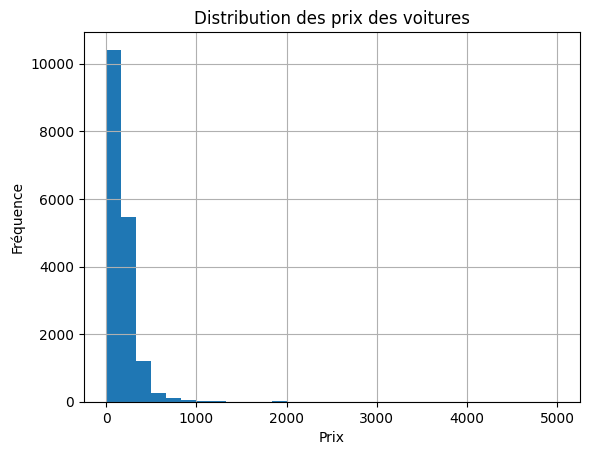

In [ ]:
# Analyser la distribution des prix
import matplotlib.pyplot as plt
df_eda['Prix'].hist(bins=30)
plt.title('Distribution des prix des voitures')
plt.xlabel('Prix')
plt.ylabel('Fréquence')
plt.show()


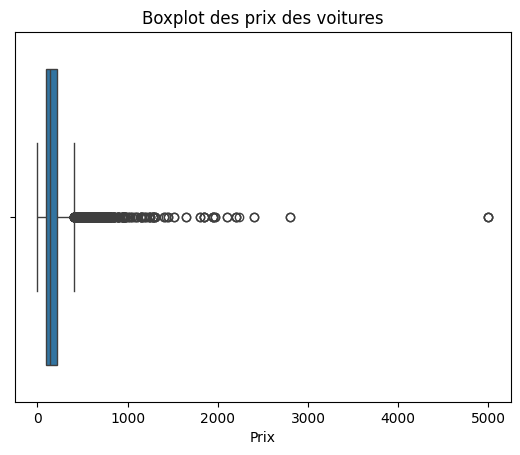

In [ ]:
#  boxplot te permettra d’observer les valeurs extrêmes et la dispersion des prix.
import seaborn as sns
sns.boxplot(x=df_eda['Prix'])
plt.title('Boxplot des prix des voitures')
plt.show()


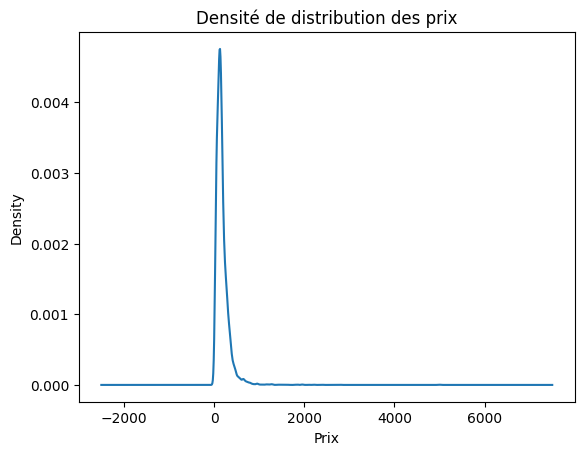

In [ ]:
# Utiliser un plot de densité pour observer où la plupart des prix sont concentrés.
df_eda['Prix'].plot(kind='kde')
plt.title('Densité de distribution des prix')
plt.xlabel('Prix')
plt.show()


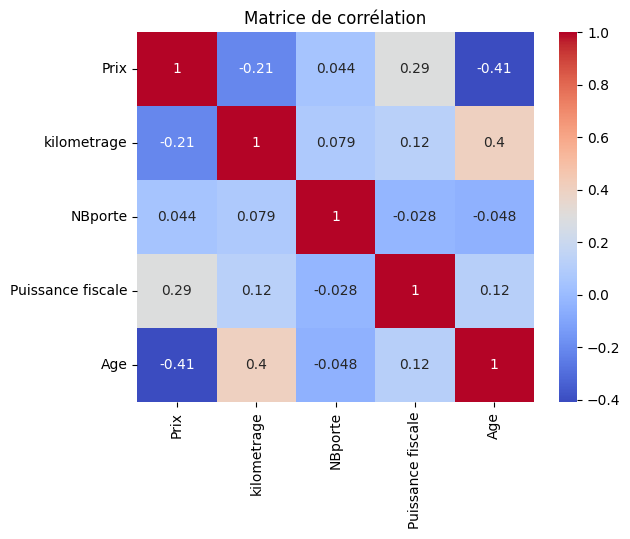

In [ ]:
# Utilise une matrice de corrélation pour analyser la relation entre les différentes variables (âge, marque, kilométrage, etc.) et le prix.
# Sélectionner uniquement les colonnes numériques
df_numeric = df_eda.select_dtypes(include=['float64', 'int64'])

# Calculer la matrice de corrélation
corr_matrix = df_numeric.corr()

# Afficher la matrice de corrélation
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()



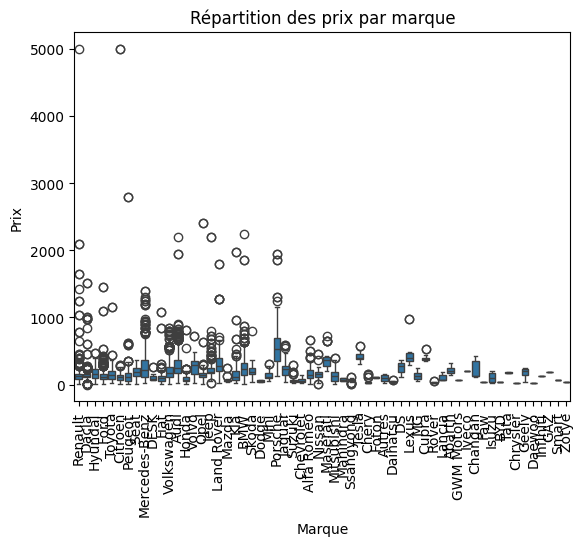

In [ ]:
# Crée un boxplot ou bar plot pour visualiser la répartition des prix en fonction de la marque ou du type de carburant.
sns.boxplot(x='Marque', y='Prix', data=df_eda)
plt.title('Répartition des prix par marque')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Utilise la régression linéaire pour analyser l'impact des variables numériques sur le prix.
from sklearn.linear_model import LinearRegression
X = df_eda[['kilometrage', 'Age', 'Puissance fiscale']]  # Exemple de variables
y = df_eda['Prix']
model = LinearRegression()
model.fit(X, y)
print('Coefficients :', model.coef_)


Coefficients : [-0.17887506 -9.23552472 29.14787159]


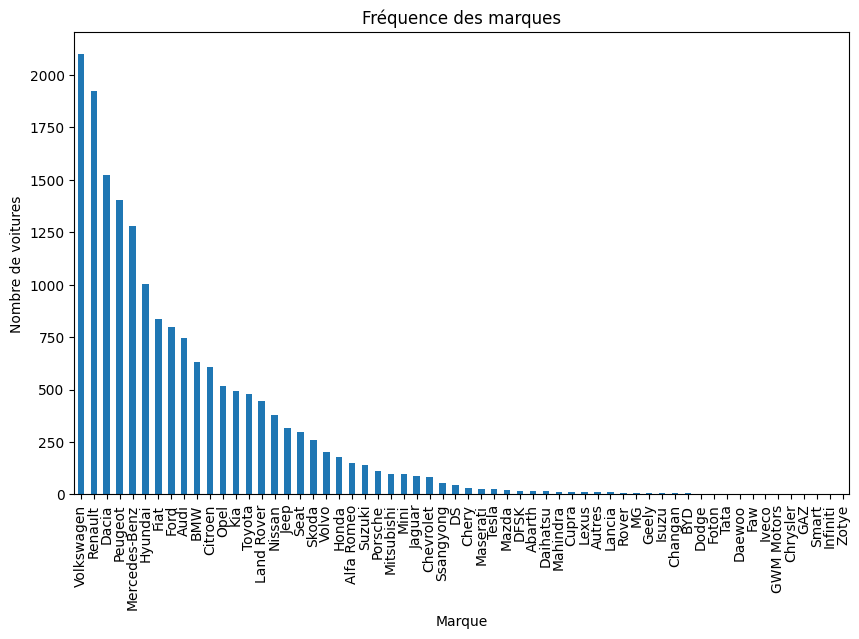

In [ ]:
# Utilise un bar plot pour visualiser la fréquence des marques et modèles.
marque_counts = df_eda['Marque'].value_counts()
marque_counts.plot(kind='bar', figsize=(10,6))
plt.title('Fréquence des marques')
plt.ylabel('Nombre de voitures')
plt.show()


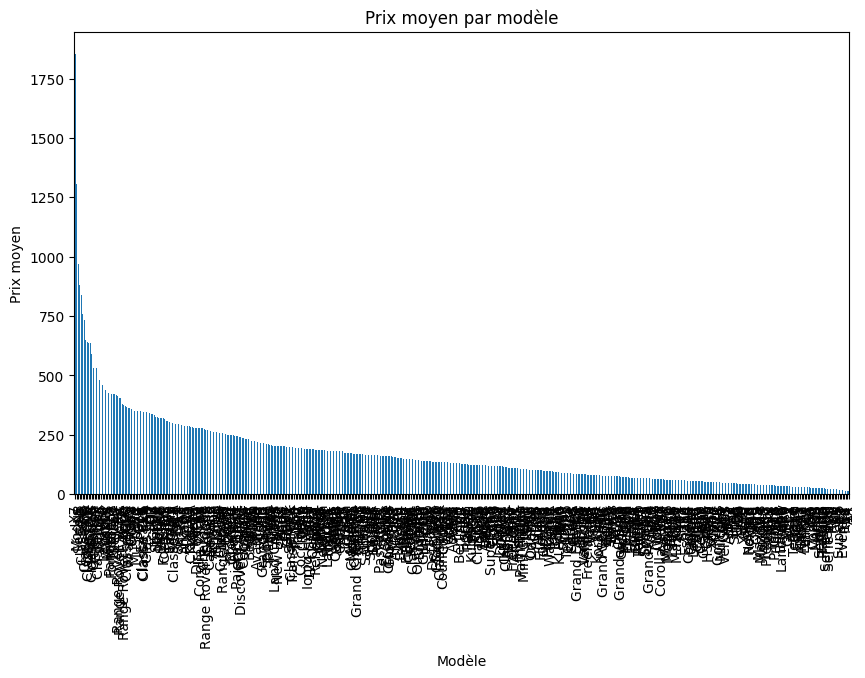

In [ ]:
# Crée un bar plot ou boxplot pour comparer les prix moyens des modèles populaires.
modele_prices = df_eda.groupby('Modèle')['Prix'].mean().sort_values(ascending=False)
modele_prices.plot(kind='bar', figsize=(10,6))
plt.title('Prix moyen par modèle')
plt.ylabel('Prix moyen')
plt.show()


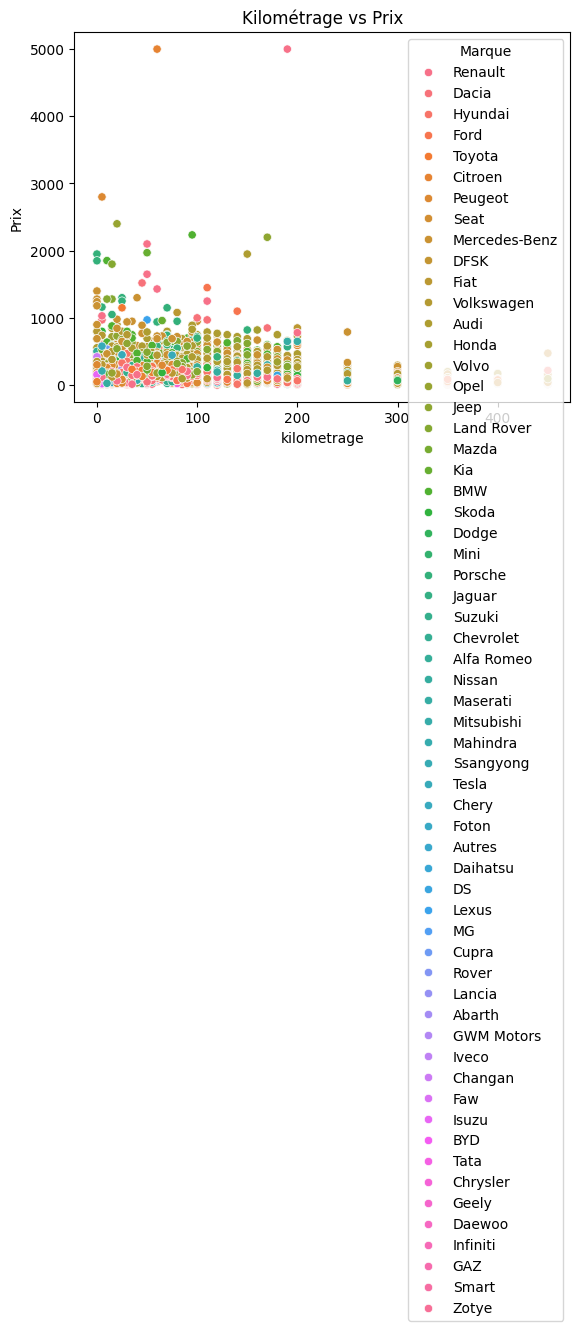

In [ ]:
# Si un modèle a un écart de prix élevé, cela peut indiquer qu'il est surévalué ou sous-évalué. Utilise un scatter plot pour analyser les prix en fonction des caractéristiques (ex : kilométrage vs prix).
sns.scatterplot(x='kilometrage', y='Prix', hue='Marque', data=df_eda)
plt.title('Kilométrage vs Prix')
plt.show()


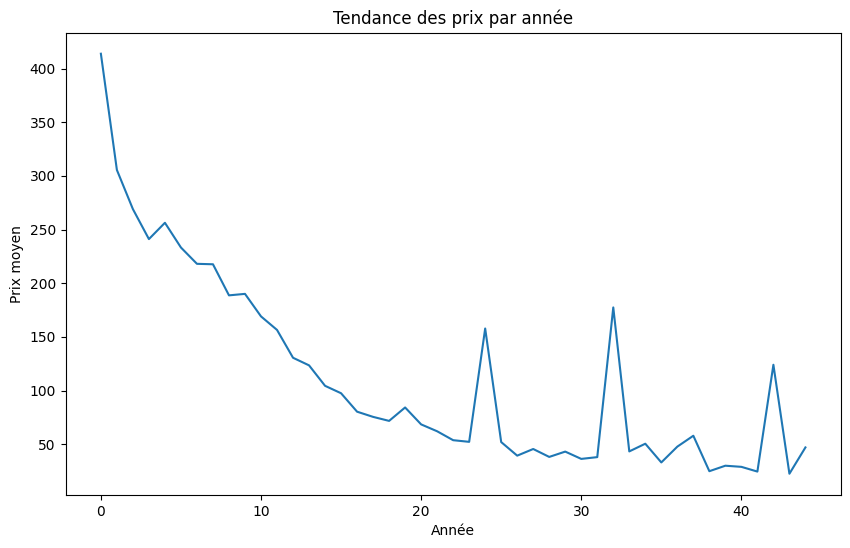

In [ ]:
# Si tu as une colonne représentant l’année ou le mois, tu peux créer un plot temporel pour visualiser les tendances des prix au fil du temps.
df_eda.groupby('Age')['Prix'].mean().plot(kind='line', figsize=(10,6))
plt.title('Tendance des prix par année')
plt.xlabel('Année')
plt.ylabel('Prix moyen')
plt.show()
